In [44]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

df1=pd.read_csv("cleaned.csv",index_col="Rank")
df1



,Title,Score,Episodes,Members_Votes,Type,Premiered,Rating,Source,Studio,Top
Rank,,,,,,,,,,
1,Fullmetal Alchemist: Brotherhood,9.15,100,2720933,2,2009,2,5,340,1
2,Gintama°,9.09,100,495687,2,2015,2,5,340,1
3,Shingeki no Kyojin Season 3 Part 2,9.09,50,1650249,2,2019,2,5,340,1
4,Steins;Gate,9.09,50,2122353,2,2011,2,5,340,1
5,Fruits Basket: The Final,9.06,50,293483,2,2021,2,5,340,1
...,...,...,...,...,...,...,...,...,...,...
9980,UG☆Ultimate Girls,5.63,50,8542,2,2005,2,5,313,0
9982,Wan Wan Chuushingura,5.63,1,935,0,1963,1,5,82,0
9983,A Brightening Life,5.63,1,309,0,2010,0,5,162,0


<AxesSubplot:title={'center':'Types'}, ylabel='Type'>

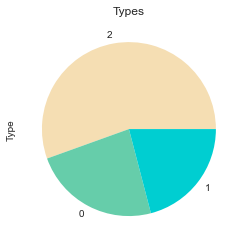

In [32]:
#CT and chi2 test
ctRatTyp=pd.crosstab(df1['Rating'],df1['Type'],normalize='index')

type #pie for type. 
mycolors = ['wheat', 'mediumaquamarine','darkturquoise']
df1['Type'].value_counts().plot(kind='pie', colors = mycolors,title="Types")


<AxesSubplot:title={'center':'Rating'}, ylabel='Rating'>

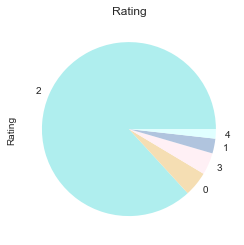

In [33]:
 #pie for rating. 
mycolors = ['paleturquoise','wheat', 'lavenderblush','lightsteelblue','lightcyan','darkturquoise']
df1['Rating'].value_counts().plot(kind='pie', colors = mycolors,title="Rating")



<AxesSubplot:title={'center':'Episodes'}>

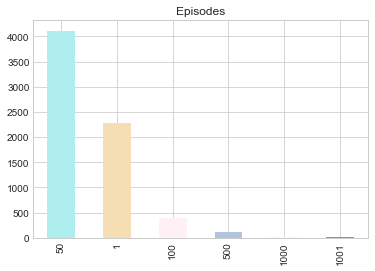

In [34]:
df1['Episodes'].value_counts().plot(kind='bar', color=mycolors,title="Episodes")

(array([1382., 1935., 1927., 1150.,  444.,   81.]),
 array([5.63      , 6.21666667, 6.80333333, 7.39      , 7.97666667,
        8.56333333, 9.15      ]),
 <BarContainer object of 6 artists>)

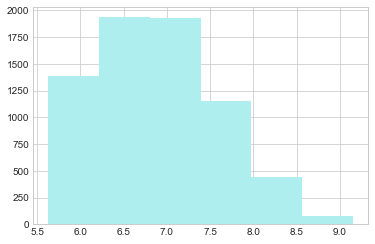

In [35]:
plt.hist(df1["Score"],bins=6,color='paleturquoise')

<AxesSubplot:xlabel='Members_Votes', ylabel='Score'>

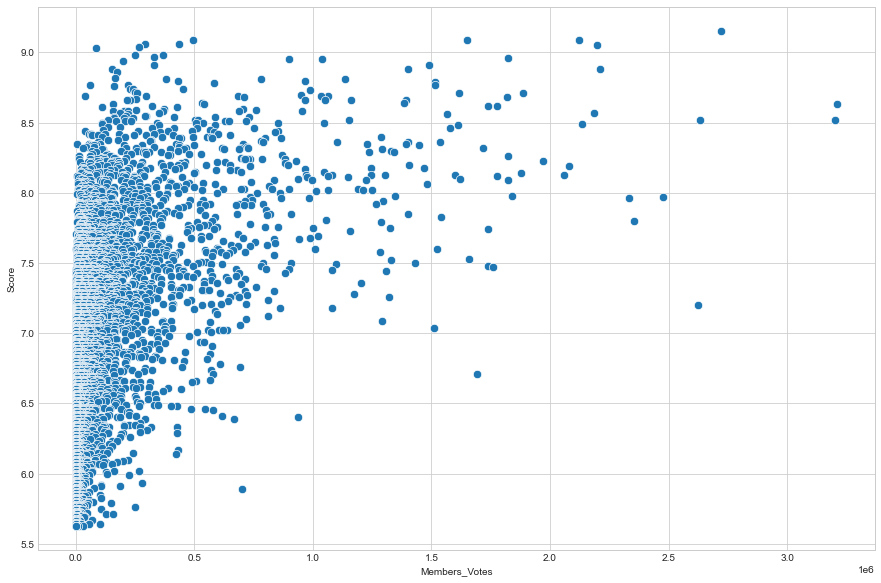

In [45]:
fig=plt.figure(figsize=(15,10))
sns.scatterplot(x='Members_Votes',y='Score',s=70,data=df1)


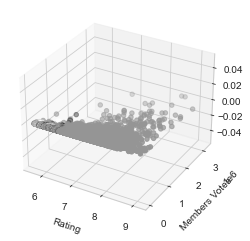

In [65]:
#3D

from mpl_toolkits.mplot3d import Axes3D

ax=plt.axes(projection='3d')

xdata=df1["Score"]
ydata=df1["Members_Votes"]
zdata=df1['Rating']
plt.xlabel('Rating')
plt.ylabel('Members Votes')

ax.scatter3D(xdata,ydata,c=zdata,depthshade=True)

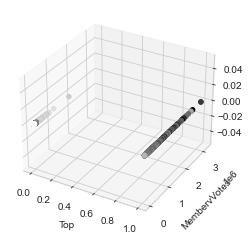

In [42]:
ax=plt.axes(projection='3d')

xdata=df1["Top"]
ydata=df1["Members_Votes"]
zdata=df1['Score']
plt.xlabel('Top')
plt.ylabel('Members Votes')

ax.scatter3D(xdata,ydata,c=zdata,depthshade=False)

/Users/dayanapergament/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/dayanapergament/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Members_Votes', ylabel='Density'>

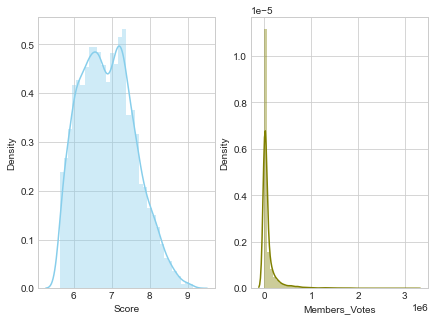

In [47]:
df2=pd.read_csv("MAL_complete10.csv",index_col="Rank")
df2
f, axes = plt.subplots(1, 2, figsize=(7, 5))
# Plot Histogram plot with total_bill column
sns.distplot( df1["Score"] , color="skyblue", ax=axes[0])
# Plot Histogram plot with tip column
sns.distplot( df1["Members_Votes"] , color="olive", ax=axes[1])



In [10]:
#get best Scores per Columns
def max4title(df,col,title):
    maximum=0
    for index, row in df.iterrows():
        s=float(row["Score"])
        isTitle=row[col]
        if isTitle==title and s>maximum:
            maximum=s
            
    return maximum

def best4col (df,col):
    b=[]
    a=df[col].unique()
    for i in a:
        maxi=max4title(df,col,i)
        b.append(maxi)
        
    return b    


In [11]:
a=max4title(df1,'Rating',"Teens 13 or older")
print (a)

m=best4col(df1,'Rating')
print(m)

9.15
[9.15, 6.47, 6.46, 6.46, 6.38]


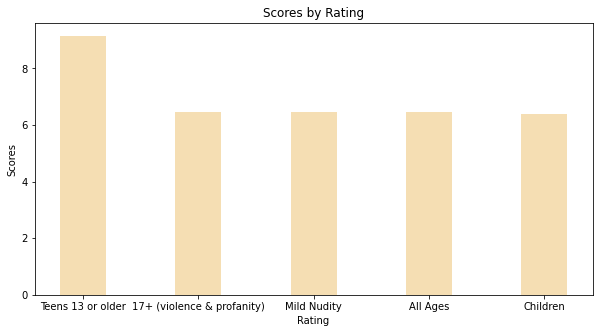

In [12]:



Rating =df1["Rating"].unique()
ScorePerRating=best4col(df1,'Rating')
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Rating, ScorePerRating, color ='wheat',
        width = 0.4)
 
plt.xlabel("Rating")
plt.ylabel("Scores")
plt.title("Scores by Rating")
plt.show()






ch


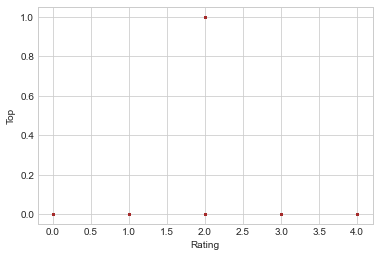

In [68]:
#scatter plots

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

plt.plot(df1['Rating'], df1['Top'],'o',markersize=2, color='brown')
plt.xlabel('Rating')
plt.ylabel('Top')


print("ch")

ch


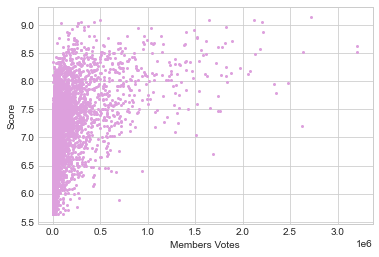

In [71]:
#scatter plots

plt.plot(df1['Members_Votes'], df1['Score'],'o',markersize=2, color='plum')
plt.xlabel('Members Votes')
plt.ylabel('Score')


print("ch")

In [77]:
from scipy.stats import pearsonr
corr,_=pearsonr(df1['Members_Votes'],df1['Score'])

corr

0.4588359842609429

In [82]:

from scipy.stats import chi2_contingency
contigency= pd.crosstab(df1['Rating'], df1['Premiered'])
contigency


plt.figure(figsize=(12,8))



c, p, dof, expected = chi2_contingency(contigency)

print(int(p))




0


<Figure size 864x576 with 0 Axes>

Text(0, 0.5, 'Top')

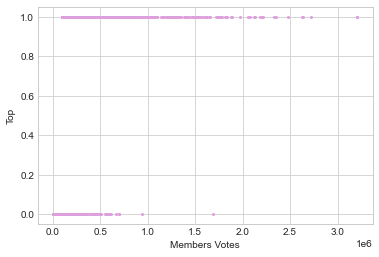

In [74]:
plt.plot(df1['Members_Votes'], df1['Top'],'o',markersize=2, color='plum')
plt.xlabel('Members Votes')
plt.ylabel('Top')




Text(0, 0.5, 'Rating')

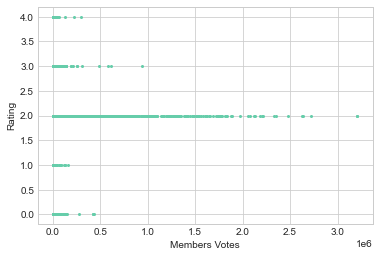

In [85]:
plt.plot(df1['Members_Votes'], df1['Rating'],'o',markersize=2, color='mediumaquamarine')
plt.xlabel('Members Votes')
plt.ylabel('Rating')





In [ ]:
#pearson

In [17]:
pd.crosstab(df1['Top'], df1['Rating'])

Rating,17+ (violence & profanity),All Ages,Children,Mild Nudity,Teens 13 or older
Top,,,,,
0,282,319,190,122,4708
1,0,0,0,0,1298


In [18]:
pd.crosstab(df1['Top'], df1['Members_Votes'])

Members_Votes,197,202,216,225,230,243,251,283,293,308,...,2199656,2209772,2333533,2355048,2474736,2623222,2630981,2720933,3202670,3208380
Top,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


/Users/dayanapergament/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Members_Votes', ylabel='Top'>

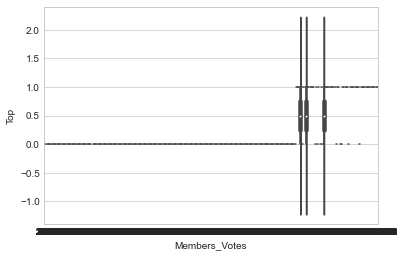

In [73]:
sns.violinplot(df1['Members_Votes'], df1['Top'])

sns.violinplot(df1['Members_Votes'],df1['Rating'])

/Users/dayanapergament/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Members_Votes', ylabel='Rating'>

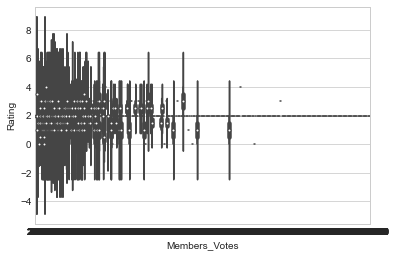

In [86]:
sns.violinplot(df1['Members_Votes'],df1['Rating'])

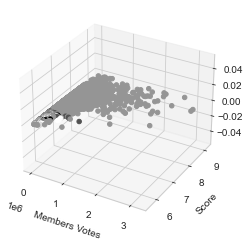

In [87]:
ax=plt.axes(projection='3d')

xdata=df1["Members_Votes"]
ydata=df1["Score"]
zdata=df1['Rating']
plt.xlabel('Members Votes')
plt.ylabel('Score')

ax.scatter3D(xdata,ydata,c=zdata,depthshade=False)